# Problem Set 1 (61 points)

In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from numpy import unravel_index
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.gaussian_process.kernels import ExpSineSquared
import matplotlib.patches as mpatches

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

# Problem 1 (18 pts)

### Problem 1.0 (Matrix norms) (8 pts)

1. For any norm $\|\cdot\|$ in finite dimentional space $\mathbb{C}^{N}$ we define dual norm $\|x\|^{'} = \sup\left\{\left|y^{\star} x\right|:\left\|y\right\|=1\right\}$, where ${\cdot}^{\star}$ denotes transpose complex-conjugate vector.

+ (2 pts). Prove that $\|\cdot\|^{'}$ is a norm.

+ (2 pts). Find dual norms for Chebyshev norm $\left\|x\right\|_{\infty} = \max\limits_{i=1,\dots, N}|x_{i}|$ and $l_1$ norm $\left\|x\right\|_1 = \sum\limits_{i=1}^{N}|x_{i}|$.

+ (2 pts). Find dual norm for $l_p$ norm $\left\|x\right\|_{p} = \left(\sum\limits_{i=1}^{N}|x_{i}|^{p}\right)^{1/p}$.

+ (2 pts). Find dual norm for weighted norm $\left\|x\right\|_{A} = \left(x^T A x\right)^{1/2}$ with positive-definite matrix $A$ and $x\in\mathbb{R}^{N}$.

1. Proof: \
    Non-negativity:
    1) if $x=0$ then $\|x\|=0$ then dual norm $\|x\|^{'}=0$
    2) if $x\neq{0}$: let $y^{*}=\frac{x^{*}}{\|x\|}$ then $\|y^{*}x\|^{'} = \|\frac{x^{*}x}{\|x\|}\|^{'} = \sup{{\frac{\|x\|^{2}_{2}}{\|x\|}}}_{\|y\|=1} > 0$ as $\|x\|^{2}_{2}>0$ and $\|x\| > 0$ by definitions of norm.

    Homogenity:\
        For $c\in R$: $\|cy^{*}x\|^{'} = \sup{|y^{*}cx|}_{\|y\|=1} = \sup{{|c||y^{*}x|}}_{\|y\|=1} = |c|\sup{|y^{*}x|}_{\|y\|=1} = |c|\|y^{*}x\|^{'}$

    Triangul inequaity:\
    $\|x+z\|^{'} = \sup{|y^{*}(x+z)|}_{\|y\|=1} = \sup{| y^{*}x + y^{*}z |}_{\|y\|=1} \leq{\sup{|y^{*}x|}_{\|y\|=1}  + \sup{|y^{*}z|}_{\|y\|=1} } \leq{\|x\|^{'} + \|z\|^{'}}$ \
    Thus, $\|x\|^{'} = \sup{\left\{y^{*}x: \|y\|=1\right\}}$ is a norm.

2. To find a dual norm, we need to solve an optimization problem: $\|x\|^{'} = \sup{|y^{*}x|}_{\|y\|=1}$,\
      also we know that: $|y^{*}x|=|\sum\limits_{i=1..N} y_ix_i| \leq {\sum\limits_{i=1..N} |y_ix_i|} \leq {\max{(y^{*})} \sum\limits_{i=1..N} |x_i|}\hspace{1cm}$ thus $\hspace{1cm}|y^{*}x| \leq {\|y\|_{\infty}\|x\|_{1}}$ and this is a particular case of [Hölder`s inequality](https://en.wikipedia.org/wiki/H%C3%B6lder%27s_inequality) \
     Dual norm for Chebyshev norm:\
    Given vector $x$, the equality holds when $y$ is such that $\|y\|_{\infty}=1$. Where $y_i=\frac{x_i}{|x_i|}$ for $i$ s.t. $x_i\neq{0}$ and $y_i=0$ elsewhere:\
    $\|x\|^{'}=\max\limits_{\|y\|_{\infty}=1}{|y^{*}x|}=\|x\|_1$, as $|y^{*}x| = |\sum{x_i\frac{x_i}{|x_i|}}| = \sum{|x_i|} = \|x\|_{1}$

    Dual norm for L1 norm:\
    Given vector $x$, the equality holds when $y$ is such that $\|y\|_1=1$. Where $y_i=1$ for $i=\argmax\limits_{k=1..N}{(x_k)}$ and $y_i=0$ elsewhere:\
     $\|x\|^{'}=\max\limits_{\|y\|_1=1}{|y^{*}x|}=|x|_{\infty}$, as $|y^{*}x| = |\sum{...0x_i+1x_{max}+0x_{i+2}...}| = \|x\|_{\infty}$

3.  Basically, we need to show that $\|x\|^{'}_p = \sup\left\{|{y^{*}x}|, \|y^{*}\|_p={1}\right\} = \|x\|_q$

    Lets revise Hölder`s inequality rewritten in terms of particular norms:\
    $y^{*}x \leq{|y^{*}x|} \leq {\sum{|y_ix_i|}} \leq {(\sum\limits_{i=1..N}{|x|_i^q})^{1/q} (\sum\limits_{i=1..N}{|y|_i^p})^{1/p}} \leq{\|x\|_q} $ where $\frac{1}{p} + \frac{1}{q} = 1$ and $p, q \in{(1, \infty)}$
    
    To show tha the supremum is exactly $\|x\|_q$ let`s find single $y$ with $\|y\|_p\leq{1}$ such that $\sum{y_ix_i} = \|x\|_q$ and let $y_i=sign(x_i)|x_i|^{q-1}$

    Thus, $\sum{y_ix_i} = \sum{x_isign(x_i)|x_i|^{q-1}} = \sum{|x_i|^q} = \|x\|_q^q$\
    Also we can calculate $\|y\|_p^p = \sum{|y_i|^p} = \sum{|sign(x_i)|x_i|^{q-1}|^p} = \sum{|x_i|^q} = \|x\|_q^q$ as $p=\frac{q}{q-1}$

    Now lets choose such $z := \frac{y}{\|y\|_p}$ so that $\|y\|_p>{0}$ and the fact that $\|y\|_p = (\|y\|_p^p)^{1/p} = (\|x\|_q^q)^{1/p} = \|x\|_q^{q/p}$\
    then $\sum{z_ix_i} = \sum{x_i\frac{y_i}{\|y\|_p}} = \frac{1}{\|y\|_p}\sum{y_ix_i} = \frac{1}{\|x\|_q^{q/p}}\|x\|_q^q = \|x\|_q^{q-q/p} = \|x\|_q$
	
    Thus, we have found single $z:=\frac{y}{\|y\|_p} \in\R^n$ where $y_i=sign(x_i)|x_i|^{q-1}$ with $\|z\|_p\leq{1}$ such that $\sum{z_ix_i} = \|x\|_q$ and proved that $\|x\|^{'}_p = \sup\left\{|{y^{*}x}|, \|y^{*}\|_p={1}\right\} = \|x\|_q$
4.  By definition $\|X\|_{A}^{'} = \sup\left\{|y^{*}x|, \|y\|_A = (y^TAy)^{1/2} = 1\right\}$\
    as A is a positive-definite matrix, we can decompose it with Cholesky as : $ A = LL^T$ where L is a lower triangular matrix with real and positive diagonal entries, and $L^T$ denotes the conjugate transpose of L.
    Thus, we can rewrite the problem as $\|X\|_{LL^T_2}^{'} = \sup\left\{|y^{*}x|, (y^TLL^Ty)^{1/2} = 1\right\}$ and as $(y^TLL^Ty) = 1$, its equivalent to $\|L^Ty\|_2^2=1$. Lets $z = L^Ty$ thus, $y = L^{-T}z$ and $\|z\|_2^2 = \|L^Ty\|_2^2=1$ \
    Lets rewrite the problem as follows: $\|X\|^{'}_A = \sup\left\{|y^Tx|, (y^TAy)^{1/2} = 1\right\} = \sup\left\{|L^{-T}zx|, \|z\|_2 = 1\right\} = \sup\left\{|L^{-1}xz|, \|z\|_2 = 1\right\}$\
    Due to Hölder`s inequality: $|L^{-1}xz| \leq {\|L^{-1}x\|_2 \|z\|_2}$
    
    Thus, when $\sup\left\{|L^{-1}xz|, \|z\|_2 = 1\right\} = \|L^{-1}x\|_2$\
    and $\|L^{-1}x\|_2 = (x^TL^{-T}L^{-1}x)^{-1/2} = (x^T(LL^{T})^{-1}x)^{-1/2} = \|X\|_{(LL^{T})^{-1}} = (x^TA^{-1}x)^{-1/2} = \|X\|_{A^{-1}}$
    
    Finally, $\|X\|_{A}^{'} = \sup\left\{|y^{*}x|, \|y\|_A = 1\right\} = \|X\|_{A^{-1}}$
    


### Problem 1.1 (Matrix norms) (10 pts)

1. Let $U \in \mathbb{R}^{n \times r}$ be an $n \times r$ matrix with orthonormal columns $U^{\top} U = I_r$. Let $V$ be an $m \times r$ matrix. 

+ (2 pts). Propose an algorithm for the computation of $\Vert A \Vert^2_F$, where $A = U V^{\top}$, and estimate its complexity with respect to $n, m, r$. How orthogonalization can be used? 

As we know from lecture 2: $\|A\|_F^2 = trace(A^TA) = trace((UV^T)^TUV^T) = trace(V(U^TU)V^T) = trace(VV^T) = \sum\limits_{i=1..m}{v_{ii}}$\
Transposing matrix V costs $O(mr)$ operations . To compute the trace, we dont actually need to multiply matrices. Its sufficient to compute only diagonal elements of resulting matrix. Thus, multiplication of each pair (row-column) costs r, and cause of M pairs the complexity is: $O(mr)$, for computing trace: $O(m)$, in total: $O(2mr+m) \approx {O(mr)}$

+ (3 pts). Consider the matrix $B = A \circ A$, where $\circ$ is the elementwise product of matrices (i.e., the elements of the matrix $B$ are squares of the elements of the matrix $A$). What is the maximal possible rank of the matrix $B$? 

Lets rewrite matrixes as sum of rank-1 matrixes: $A = \sum\limits_{i=1..r_A}{u_i v_i^{*}}$ and thus:\
$B = A \circ A = \sum\limits_{i=1..r_A}{}\sum\limits_{j=1..r_A}{(u_i \circ u_j)(v_i^{*} \circ v_j^{*})}$, thus $rank(A \circ A) \leq{rank(A)} $\
For example, let matrix $A = \begin{bmatrix}
1 & 1\\
1 & -1
\end{bmatrix}$ Rank(A)=2, its Hadamard product gives: $ A \circ A = \begin{bmatrix}
1 & 1\\
1 & 1
\end{bmatrix}$ which has Rank ($A \circ A$)=1

Elementwise product (or Hadamard product) has this inequality for rank: $rank(A\circ B) \leq{rank(A)rank(B)}$. In our case maximum $rank_{max}(A \circ A) = {rank(A)}$

+ (5 pts). Propose an algorithm for the computation of $\Vert B \Vert^2_F$ and estimate its complexity with respect to $n, m, r$.

As $A = UV^T$, and $U^TU=I$, and $B = A \circ A$, then By definition $\|B\|_F^2 = tr(B^TB) = tr((A \circ A)^T(A \circ A)) = tr((A^T \circ A^T)(A \circ A)) = tr((UV^T)^T \circ (UV^T)^T)((UV^T)\circ(UV^T)) = tr ((U^TV \circ U^TV)(UV^T \circ UV^T)) = tr (U^TVUV^T \circ U^TVUV^T)=tr(VV^T\circ VV^T) = tr((V \circ V)(V^T \circ V^T)) = tr(V^2(V^{T})^2)$


As $V^2$ and $(V^{T})^2$ costs $O(2mr)$,\
transpose $V^T$ costs $O(mr)$,\
$V^2(V^{T})^2$ costs $O(mrm)+O(3mr)$,\
trace costs $O(m)$,\
in total $\|B\|_F^2$ costs $O(mrm + 3mr + m) \approx{O(mrm)}$

### Problem 1.2 (Unitary and orthogonal matrices) (4 pts)

+ (2 pts). Let $O\in\mathbb{R}^{n\times n}$ be orthogonal matrix. Characterise explicitly all orthogonal matrices that are positive definite. You may start with $n=2$.

1. If $O\in\mathbb{R}^{n\times n}$ is an orthogonal matrix, $OO^T = I$ and $O^T = O^{-1}$. If $v$ is a vector in an n-dimensional real Euclidean space and $O$ is ortogonal matrix:\
    $vv^T = (Ov)(Ov)^T = OvO^Tv^T$, thus linear transfprmations such as: rotations, reflections, and their combinations produce orthogonal matrices. And $\|Ov\|_2 = \|v\|_2$
2. If Ermition matrix $M \in \mathbb{C}^{n\times n}$ and any non-zero vector $v \in \mathbb{C}^{n}$ such that $v^{*}Mv \geq{0}$, or if all eigen-values are positive, or M is [Gramm matrix](https://en.wikipedia.org/wiki/Gram_matrix), or satisfies [Silvester criterion](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D0%B8%D0%BB%D1%8C%D0%B2%D0%B5%D1%81%D1%82%D1%80%D0%B0) , M is positive definite.

If $A$ is a real [n×n] matrix which is orthogonal and symmetric, then $A2=AA^T=I$. Therefore the eigenvalues of $A$ are all equal to ±1. If also $A$ is positive definite then they must all be equal to 1. Finally, $A$ is diagonalizable since it is symmetric, and since all the eigenvalues of $A$ are equal to 1 it follows that $A$ is the identity matrix.

+ (2 pts). Show that any unitary matrix from $\mathbb{C}^{n\times n}$ can be represented as a product of at most $n$ Householder reflectors.

Let $A$ be an unitary matrix from $\mathbb{C}^{n\times n}$\
Lecture 2 tells us: "(QR decomposition) Every $A\in \mathbb{C}^{n\times m}$ can be represented as $ A = QR $ where $Q$ is unitary and $R$ is upper triangular.\
Thus, we need to show that $H_{n}H_{n-1}...H_{1} A = R$ where $H_i$ is a Housholder reflector and $R$ is upper triangular matrix. Moreover, each  $H_i$ is unitary and Hermitian :\
$H = I - 2vv^*$ then $HH^* = (I - 2vv^*)(I - 2vv^*)^* = (I - 2vv^*)(I - 2vv^*) = I - 2Ivv^* - 2vv^*I + 4vv^*vv^* =I - 4vv^* + 4vv^* = I$\
Thus, $(\prod\limits_{i=1..n}{H_i}) A = R$ and  matrix $A$ from $\mathbb{C}^{n\times n}$ could be decomposed as $A = (\prod\limits_{i=1..n}{H_i})^{-1}R = (\prod\limits_{i=1..n}{H_i})R$

# Problem 2 (15 pts)

1. We define approximate $\epsilon-$ rank of matrix $A$ as $\text{rank}_{\epsilon}A = \min \left\{\text{rank}(X): \left\|A-X\right\|_{\max}\leq \epsilon\right\}$.

  
+ (6 pts). Let $f(x, y),\,x,y\in[0, 1]$ is analytic function with $|\left.\partial_y^{(k)}f(x, y)\right|_{y=0}\leq M$ for all $k$. Show that approximate rank of matrix $A_{ij} = f(x_i, y_j)$ where $x_{i},\,i=1,\dots,p$, $y_{j},\,j=1,\dots,q$ are arbitrary points inside $[0, 1]^2$, is bounded independent of $p$, $q$ and the choice of points.

For simplicity of derivations lets $z = [x,y]$, then by Taylor expantion: $f(z) \approx \sum\limits_{n=0..k}{\frac{1}{n!}\frac{\partial f^{n}(z)}{\partial z} (z)^n} = f(0) + \partial f^{1}(0)z + \frac{\partial f^{2}(0)z^2}{2!} ... $ as $|\partial^{(k)}f(z)|\leq M$ then $f(z) \approx M (I+\frac{z}{1!}+\frac{z^2}{2!})... = M\exp{(z)} = M e^{x,y}$ as $x,y \in [0;1]$ then $min(f(x,y)) = M$ and $max(f(x,y)) = Me$ if we normilize by const $M$: then  $1 \leq{f(x,y)}/M \leq e$  

Due to Eckart–Young–Mirsky theorem: the best low-rank approximation can be computed by SVD.\
Let $A_r = U_r \Sigma_r V^*_r = \sum\limits_{i=1..r}{\sigma_i u_i v_i^*}$ by SVD. Where $\Sigma_r = diag(\sigma_1, ..., \sigma_r): \sigma_1 \geq \sigma_2 \geq ... \sigma_r$ and $U_r$, $V^*_r$ are orthogonal matrices\
 Then  $\|A-A_r\|_{max} = \| \sum\limits_{i=1..n}{\sigma_i u_i v_i^*} - \sum\limits_{i=1..r}{\sigma_i u_i v_i^*}  \|_{max} = \| \sum\limits_{i=r+1..n}{\sigma_i u_i v_i^*} \|_{max} = \|\sum\limits_{i=r+1..n}{\sigma_i}\|_{max} = e*\sigma_{r+1} $


Thus, $rank_{\epsilon}(A)$ is bounded independent of $p$, $q$ and the choice of points as $  \min_{A_r} \Vert A - A_r \Vert_{max} = e*\sigma_{r+1}$ 

+ (6 pts). Extend result from the previous point (a.) to $x, y \in \mathbb{R}^{N}$. Observe how the bound depends on $N$.

If $Z =  \begin{bmatrix}
x_1 & y_1\\
x_2 & y_2\\
x_N & y_N
\end{bmatrix}$ where $x_i,y_i\in[0, 1]$ then for simplicity normilize $A = A / M$ $ A_{ij} = f(Z_{ij}) = e^{Z_{ij}} = I + Z + \frac{Z^2}{2!} + \frac{Z^3}{3!}...$\
if $Z=0$: the lower bound: $e^{Z} = I$, if $Z=I$ the upper bound: $e^{Z} = I + \frac{I}{2!} + \frac{I}{3!} ... = e$ 

+ (3 pts). Demonstarate your bounds from two previous points numerically on functions

    + (1 pts). $\cos(xy)$, $\exp(-(x-y)^2)$ and a few on your choice for $N=1$
    + (1 pts). [RBF kernel](https://scikit-learn.org/stable/modules/gaussian_process.html#radial-basis-function-rbf-kernel) for different $N$.
    + (1 pts). [Exp-Sine-Squared kernel](https://scikit-learn.org/stable/modules/gaussian_process.html#exp-sine-squared-kernel) for different $N$.


cos
Chebyshev: norm_bound:  1.5254525e-05 , error:  8.2969666e-05
Spectral_norm_bound:  5.6118265e-06 , error:  1.7889673e-05
Frobenious_norm_bound:  5.298745e-05 , error:  2.3228611e-05
-----------------------------------------------------------------------------------------------
arctan
Chebyshev: norm_bound:  4.229726e-06 , error:  3.930056e-05
Spectral_norm_bound:  1.5560292e-06 , error:  1.5355434e-05
Frobenious_norm_bound:  1.4642074e-05 , error:  1.7003531e-05
-----------------------------------------------------------------------------------------------
product
Chebyshev: norm_bound:  5.428009e-06 , error:  2.276832e-05
Spectral_norm_bound:  1.996853e-06 , error:  6.5003287e-06
Frobenious_norm_bound:  1.8838273e-05 , error:  8.853117e-06
-----------------------------------------------------------------------------------------------
exp
Chebyshev: norm_bound:  1.3446944e-05 , error:  7.8976154e-05
Spectral_norm_bound:  4.9468545e-06 , error:  1.6490034e-05
Frobenious_norm_bound:

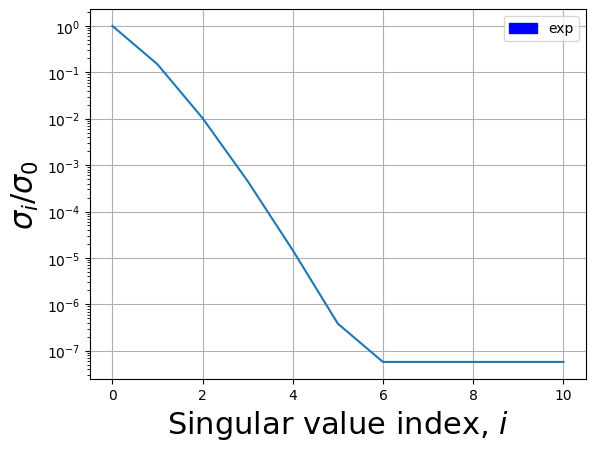

In [2]:
"""
----------------------------FOR N = 1----------------------
"""

def cos(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.cos(x[i]*y[j])
    return m

def exp(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.exp(-(x[i] - y[j])**2)
    return m

def product(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = x[i] * y[j]
    return m

def arctan(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.arctan(x[i]-y[j])
    return m


n = 1
r = 10 # low-rank
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
e = 2.718281828459045

cos = cos(x,y)
exp = exp(x,y)
product = product(x,y)
arctan = arctan(x,y)

func_list = [cos, arctan, product, exp]
func_list_names = ['cos', 'arctan', 'product', 'exp']

for f, name in zip(func_list,func_list_names):
    U, S, V = jnp.linalg.svd(f, full_matrices=False)

    fappr_U = U[:, :r]
    fappr_S = S[:r]
    fappr_V = V[:r, :] # Mind the transpose here!
    fappr = (fappr_U * fappr_S[None, :]) @ fappr_V

    chebyshev_error = np.linalg.norm(f - fappr, np.inf)
    spectral_error = np.linalg.norm(f - fappr, 2) 
    frobenious_error = np.linalg.norm(f - fappr, 'fro')

    print(name)
    print('Chebyshev: norm_bound: ', S[r] * e, ', error: ', chebyshev_error)
    print('Spectral_norm_bound: ', S[r], ', error: ', spectral_error)
    print('Frobenious_norm_bound: ', np.sqrt(np.sum(S[r:]**2)),  ', error: ', frobenious_error)
    print('-----------------------------------------------------------------------------------------------')

plt.semilogy(S[:r+1]/S[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=22)
plt.xlabel(r"Singular value index, $i$", fontsize=22)
red_patch = mpatches.Patch(color='blue', label=func_list_names[-1])
plt.legend(handles=[red_patch])
plt.grid(True)

cos
Chebyshev: norm_bound:  8.704853 , error:  12.984554
Spectral_norm_bound:  3.2023365 , error:  3.2023358
Frobenious_norm_bound:  12.763622 , error:  12.763621
-----------------------------------------------------------------------------------------------
exp
Chebyshev: norm_bound:  0.017336093 , error:  0.025121931
Spectral_norm_bound:  0.006377592 , error:  0.006377591
Frobenious_norm_bound:  0.023725066 , error:  0.023725064
-----------------------------------------------------------------------------------------------
product
Chebyshev: norm_bound:  9.061576 , error:  10.218599
Spectral_norm_bound:  3.3335676 , error:  3.3335679
Frobenious_norm_bound:  7.918135 , error:  7.918135
-----------------------------------------------------------------------------------------------
arctan_squared
Chebyshev: norm_bound:  0.30903438 , error:  0.36353374
Spectral_norm_bound:  0.113687396 , error:  0.113687344
Frobenious_norm_bound:  0.34113458 , error:  0.34113517
-------------------------

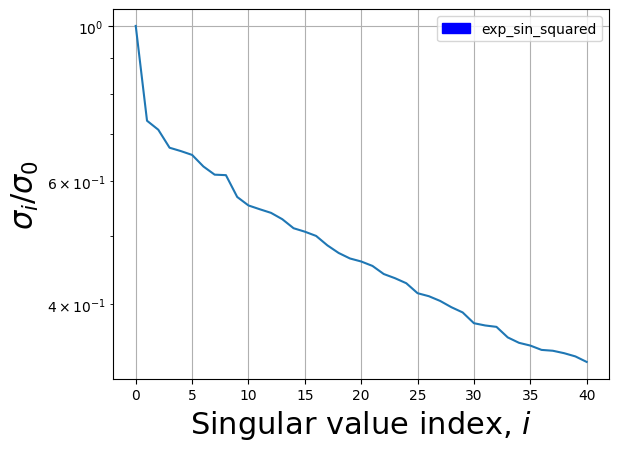

In [39]:
"""
----------------------------FOR N >> 1----------------------
x_size, y_size = [M, N], where x,y in R^N, and amount of points for grid is M
"""

def cos(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.cos(x[i,:] @ y[j,:])
    return m

def exp(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.exp(-(x[i,:] - y[j,:]) @ (x[i,:] - y[j,:]))
    return m

def product(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = x[i,:] @ y[j,:]
    return m

def arctan(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.arctan((x[i,:]-y[j,:]) @ (x[i,:]-y[j,:]))
    return m

def exp_sin_squared(x,y):
    m = np.zeros(shape=(x.shape[0], y.shape[0]))
    l = 0.1
    p = 0.1
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            m[i,j] = np.exp(-2 * np.sin((np.pi/p) * np.linalg.norm(x[i,:]-y[j,:]))**2 / (l**2))
    return m

def RBF(x,y):
    return rbf_kernel(x,y)


N = 50
M = 100
r = 40 # low-rank
x, y = np.zeros((M,N)), np.zeros((M,N))
for i in range(M):
    x[i,:] = np.random.rand(N)
    y[i,:] = np.random.rand(N)

e = 2.718281828459045

cos = cos(x,y)
exp = exp(x,y)
product = product(x,y)
arctan = arctan(x,y)
RBF = RBF(x,y)
exp_sin_squared = exp_sin_squared(x,y)

func_list = [cos, exp, product, arctan, RBF, exp_sin_squared]
func_list_names = ['cos', 'exp', 'product', 'arctan_squared', 'RBF', 'exp_sin_squared']

for f, name in zip(func_list,func_list_names):
    U, S, V = jnp.linalg.svd(f, full_matrices=False)

    fappr_U = U[:, :r]
    fappr_S = S[:r]
    fappr_V = V[:r, :] # Mind the transpose here!
    fappr = (fappr_U * fappr_S[None, :]) @ fappr_V

    chebyshev_error = np.linalg.norm(f - fappr, np.inf)
    spectral_error = np.linalg.norm(f - fappr, 2) 
    frobenious_error = np.linalg.norm(f - fappr, 'fro')

    print(name)
    print('Chebyshev: norm_bound: ', S[r] * e, ', error: ', chebyshev_error)
    print('Spectral_norm_bound: ', S[r], ', error: ', spectral_error)
    print('Frobenious_norm_bound: ', np.sqrt(np.sum(S[r:]**2)),  ', error: ', frobenious_error)
    print('-----------------------------------------------------------------------------------------------')

plt.semilogy(S[:r+1]/S[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=22)
plt.xlabel(r"Singular value index, $i$", fontsize=22)
red_patch = mpatches.Patch(color='blue', label=func_list_names[-1])
plt.legend(handles=[red_patch])
plt.grid(True)

# Problem 3 (Molecules) (16 pts)

We have in our posession a database with molecules. Each molecule has five atoms `A`, `B`, `C`, `D`, `E` located in the same plane $x, y$.

The coordinates of the molecules was collected by an automatic system that processed "pictures" from the electronic microscope. As a result, some of the samples differs by unkonwn rotation in $2D$ space. Your task is to normalize this database to find distinct molecules.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/oseledets/nla2022/main/hw1/molecules.csv", index_col=0)
data.head()

A_x  A_y       B_x       B_y       C_x       C_y       D_x       D_y  \
sample                                                                         
0       0.0  0.0 -0.568099 -0.822960  0.411480 -0.284050 -0.983627 -0.180214   
1       0.0  0.0 -0.816462  0.577399  0.288700  0.408231 -0.169043  0.985609   
2       0.0  0.0 -0.999628 -0.027283  0.013642 -0.499814 -0.726136  0.687551   
3       0.0  0.0  0.946140  0.323758 -0.161879  0.473070 -0.897953  0.440091   
4       0.0  0.0 -0.901767  0.432222 -0.216111 -0.450884  0.332018 -0.943273   

             E_x       E_y  
sample                      
0      -0.180214  0.983627  
1       0.169043 -0.985609  
2       0.687551  0.726136  
3      -0.440091 -0.897953  
4       0.943273  0.332018

In [3]:
molecules = data.to_numpy().reshape(len(data), 5, 2)
molecules.shape

(500, 5, 2)

In [4]:
def draw_molecule(ax, molecule):
    ax.scatter(*molecule.T, color="black", s=50)
    for i in range(1, molecule.shape[0]):
        ax.plot(*molecule[[0, i], :].T, color="black")
    ax.axis("off")
    ax.axis("equal")

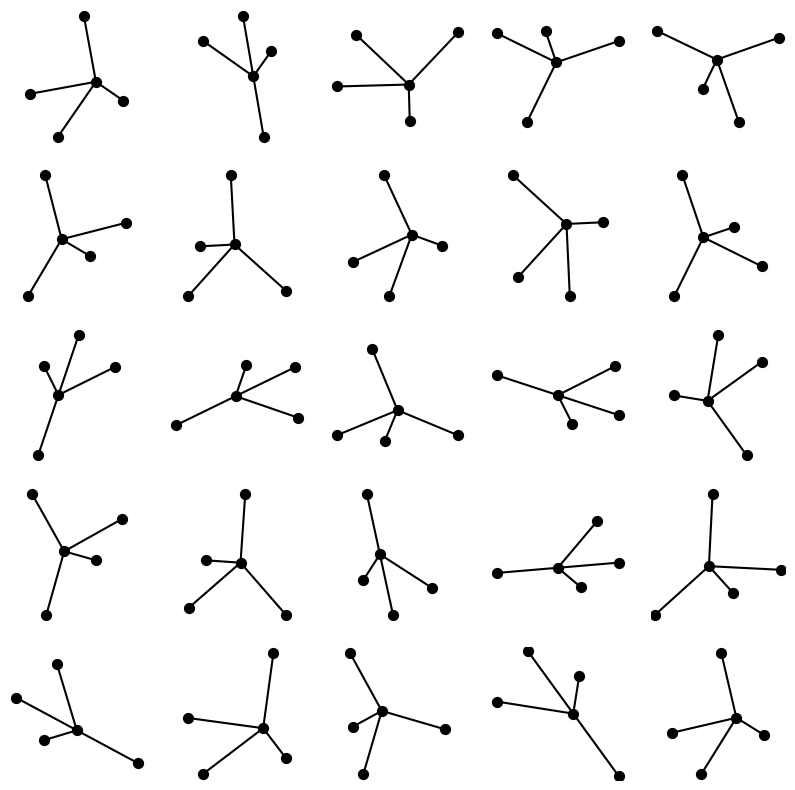

In [5]:
k = 5
fig, ax = plt.subplots(k, k, figsize=(2*k, 2*k))
ax = ax.reshape(-1,)
for i in range(k**2):
    draw_molecule(ax[i], molecules[i])

## What you should do: 

+ (2 pts). Prove that orthogonal transformations preserve $l_2$ norm, i.e., $\left\|x\right\|_2 = \left\|Ux\right\|_2$, where $U$ is an orthogonal matrix.


From the fact that $\|x\|_2^2 = x^Tx$: and $U^TU=UU^T=I$\
$\|Ux\| = (Ux)^TUx = x^TU^TUx = x^Tx = \|x\|_2^2$

In [6]:
x = np.array([1,2])
U = np.array([[1, 0],
              [0, -1]])
print('x norm: ', np.linalg.norm(x, 2))
print('Ux norm: ', np.linalg.norm(U @ x, 2))

x norm:  2.23606797749979
Ux norm:  2.23606797749979



+ (4 pts). Use the result from the previous point to construct an algorithm that distinguishes different molecules. Implement it and run on the database. Produce a list of distinct molecules and visualise them.

In [38]:
#your solution
def get_angle_between_vectors(v1, v2):
    if np.array_equal(v1, v2):
        return 0
    else:
        return np.arccos((v1 @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
            

def rotate_molecul(molecul, phi):
    R = np.array([[np.cos(phi), -np.sin(phi)],
                  [np.sin(phi), np.cos(phi)]])
    return molecul @ R

def L2(matrix):
    return np.linalg.norm(matrix, 2)
def L1(matrix):
    return np.linalg.norm(matrix, 1)

def classify_moleculs(molecules):
    """
    In this function we first measure an angle between same B-vector, than we rotate matrix by this angle.
    But arccos is in interval [0,Pi], and the real angle might be larger.
    To determine the sign of angle we measure L1 norm of difference between original matrix and rotated.
    Basically, this tells us whether we rotated in right direction or not. 
    If L2(Molecul1) == L2(Molecul2): these moleculs still can be different (reflected, for example).
    But L1 of (Molecul1 - Molecul2) helps to determine this case.
    """
    my_molecules = np.copy(molecules)
    classes = []
    eps = 1e-4
    k = 0
    while my_molecules.shape[0]!=0:
        idxs = []
        for i in range(my_molecules.shape[0]):
            angle = get_angle_between_vectors(my_molecules[0,1,:], my_molecules[i,1,:])
            rotated = rotate_molecul(my_molecules[i,:,:], angle)
            if L2(my_molecules[0,:,:]-rotated)<=eps and L1(my_molecules[0,:,:]-rotated)<=eps:
                idxs.append(i)
            else:
                rotated = rotate_molecul(my_molecules[i,:,:], -angle)
                if L2(my_molecules[0,:,:] - rotated)<=eps and L1(my_molecules[0,:,:]-rotated)<=eps:
                    idxs.append(i)
        classes.append({'class':idxs, 'array':my_molecules})
        my_molecules = np.delete(my_molecules, idxs, axis=0)
        k+=1
    return classes

In [42]:
len(classes)

5

In [39]:
classes = classify_moleculs(molecules)

total_moleculs = 0
for i in range(len(classes)):
    total_moleculs += len(classes[i]['class'])
total_moleculs

500

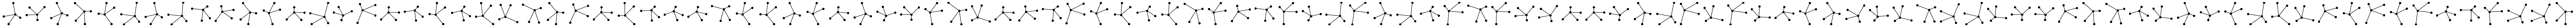

In [40]:
cls = 0
k = len(classes[cls]['class'])
if k != 1:
    fig, ax = plt.subplots(1, k, figsize=(1.5*k, 1.5))
    ax = ax.reshape(-1,)
    similar_molecules = classes[cls]['array'][classes[cls]['class'],:,:]
    for i in range(k):
        draw_molecule(ax[i], similar_molecules[i])
else: 
    fig, ax = plt.subplots(1, k, figsize=(2*k, 2*1))
    similar_molecules = classes[cls]['array'][classes[cls]['class'],:,:]
    for i in range(k):
        draw_molecule(ax, similar_molecules[i])

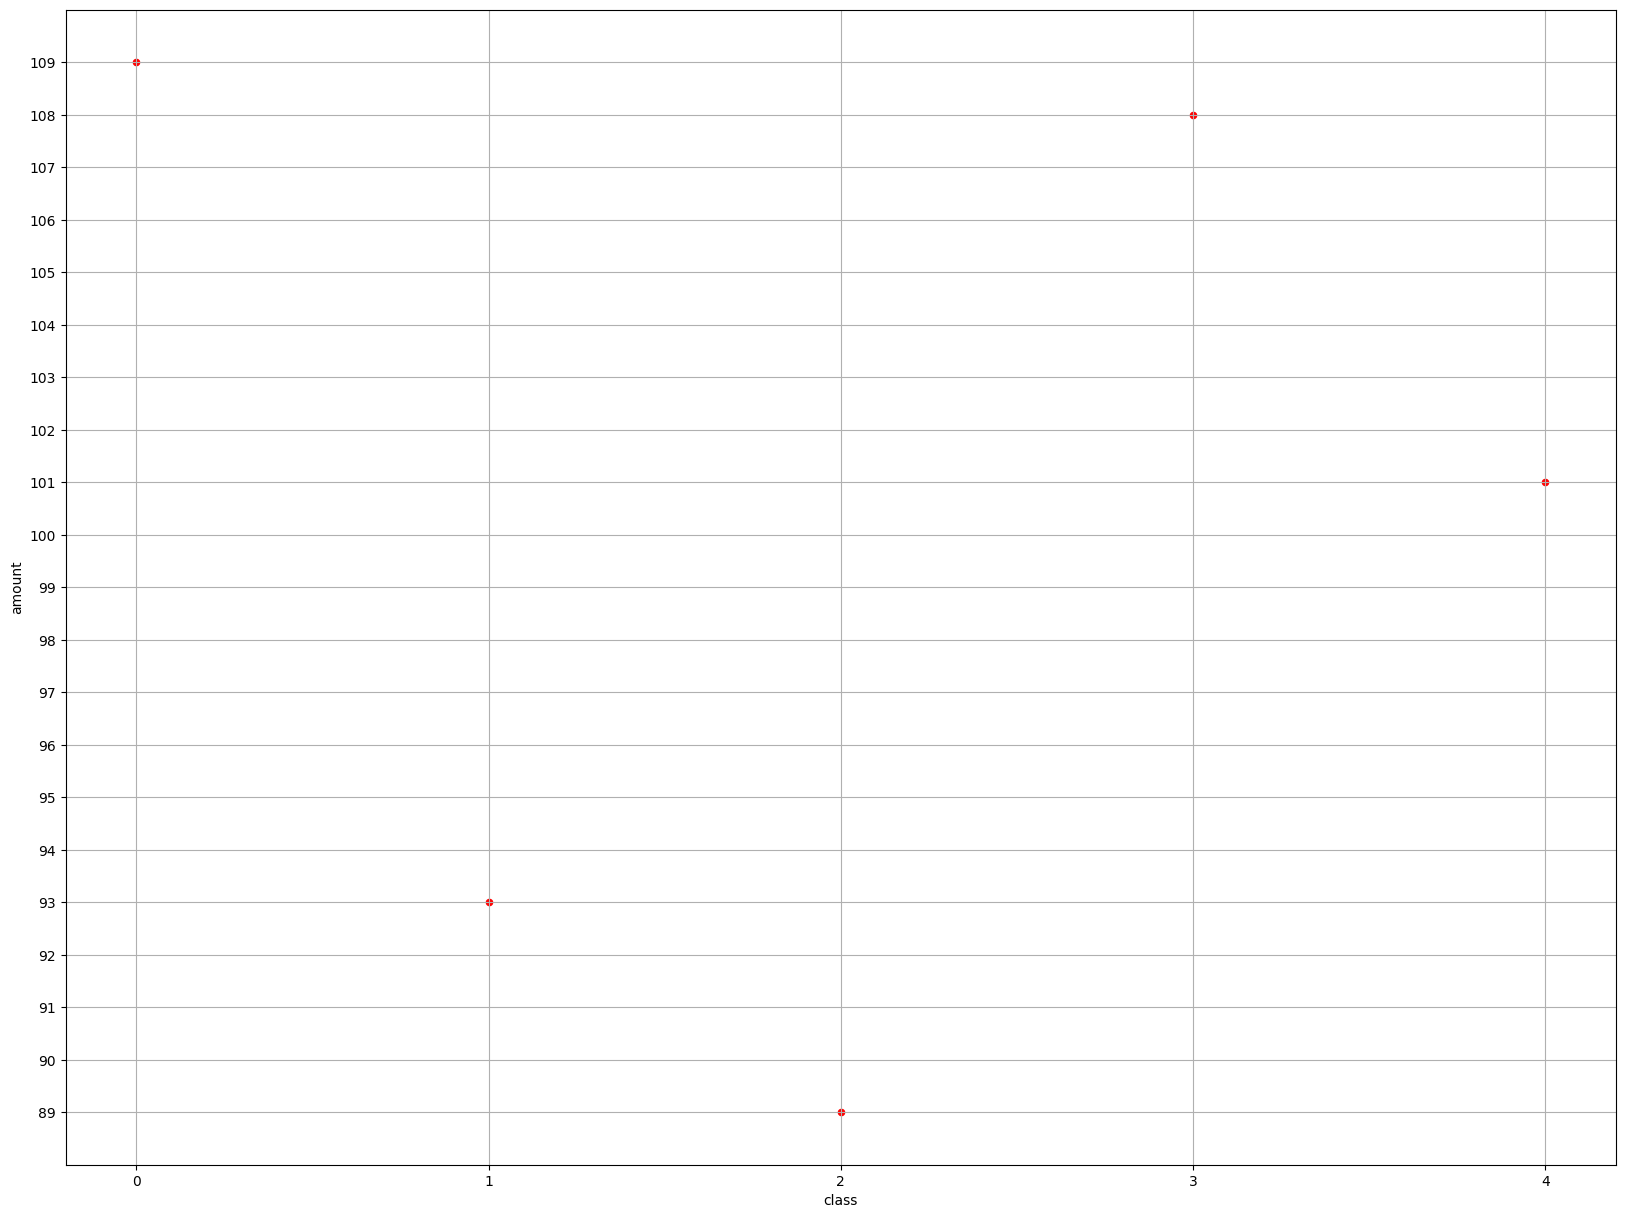

In [41]:
data = []
for cls in classes:
    data.append(len(cls['class']))
plt.figure(figsize=(20,15))
plt.scatter(range(len(classes)), data, s=20, c='red')
plt.xlabel("class")
plt.ylabel("amount")
plt.xticks(range(len(classes)))
plt.yticks(np.arange(min(data), max(data)+1, 1.0))
plt.grid()

+ (7 pts). Learn about [Kabsch algorithm](https://en.wikipedia.org/wiki/Kabsch_algorithm). Implement it and run on the database. Produce a list of distinct molecules and visualise them.

In [11]:
#your solution
def Kabsch_do_magic(M1, M2):
    """
    M1, M2 - moleculs as [5,2] matrices
    """
    H = M1.T @ M2
    U, S, Vt = np.linalg.svd(H)
    R = Vt @ U.T
    D = np.identity(Vt.shape[0])
    D[-1,-1] = np.sign(np.linalg.det(Vt @ U.T))
    R = Vt @ D @ U.T
    return R

def classify_moleculs_Kabsch(molecules):
    my_molecules = np.copy(molecules)
    classes = []
    eps = 1e-4
    k = 0
    while my_molecules.shape[0]!=0:
        idxs = []
        for i in range(my_molecules.shape[0]):
            R = Kabsch_do_magic(my_molecules[0,:,:], my_molecules[i,:,:])
            rotated = my_molecules[i,:,:] @ R
            if(np.linalg.norm(R-np.eye(2))<=eps):
                idxs.append(i)
            if np.abs(L2(my_molecules[0,:,:]) - L2(rotated))<=eps and L1(my_molecules[0,:,:]-rotated)<=eps and i not in idxs:
                idxs.append(i)

        classes.append({'class':idxs, 'array':my_molecules})
        my_molecules = np.delete(my_molecules, idxs, axis=0)
    return classes

In [43]:
classes_Kabsch = classify_moleculs_Kabsch(molecules)

In [44]:
len(classes_Kabsch)

5

In [45]:
total_moleculs = 0
for i in range(len(classes_Kabsch)):
    total_moleculs += len(classes_Kabsch[i]['class'])
total_moleculs

500

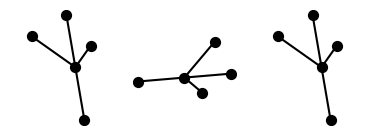

In [46]:
# TEST
M1 = molecules[1,:,:]
M2 = molecules[18,:,:]
R = Kabsch_do_magic(M1, M2)

# ax = ax.reshape(-1,)
molecules_Kabsch = [M1, M2, M2 @ R]
cls = 0
k = 3
if k != 1:
    fig, ax = plt.subplots(1, k, figsize=(1.5*k, 1.5))
    ax = ax.reshape(-1,)
    for i in range(k):
        draw_molecule(ax[i], molecules_Kabsch[i])
else: 
    fig, ax = plt.subplots(1, k, figsize=(2*k, 2*1))
    for i in range(k):
        draw_molecule(ax, molecules_Kabsch[i])

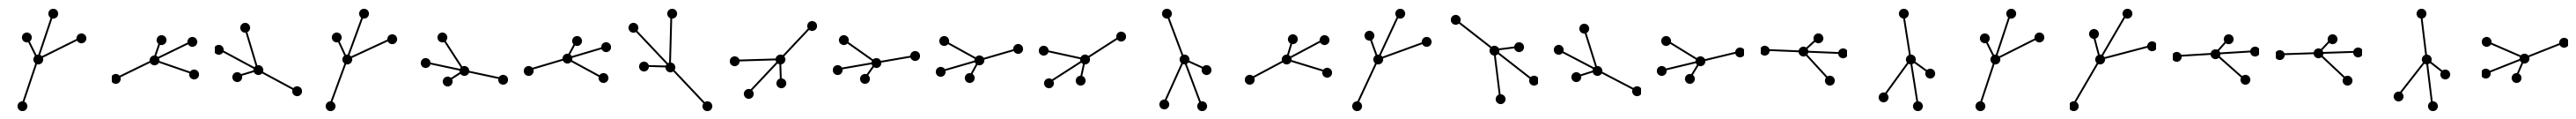

In [54]:
cls = -1
k = len(classes_Kabsch[cls]['class'])
k = k//4
if k != 1:
    fig, ax = plt.subplots(1, k, figsize=(1.5*k, 1.5))
    ax = ax.reshape(-1,)
    similar_molecules = classes_Kabsch[cls]['array'][classes_Kabsch[cls]['class'],:,:]
    for i in range(k):
        draw_molecule(ax[i], similar_molecules[i])
else: 
    fig, ax = plt.subplots(1, k, figsize=(2*k, 2*1))
    similar_molecules = classes_Kabsch[cls]['array'][classes_Kabsch[cls]['class'],:,:]
    for i in range(k):
        draw_molecule(ax, similar_molecules[i])

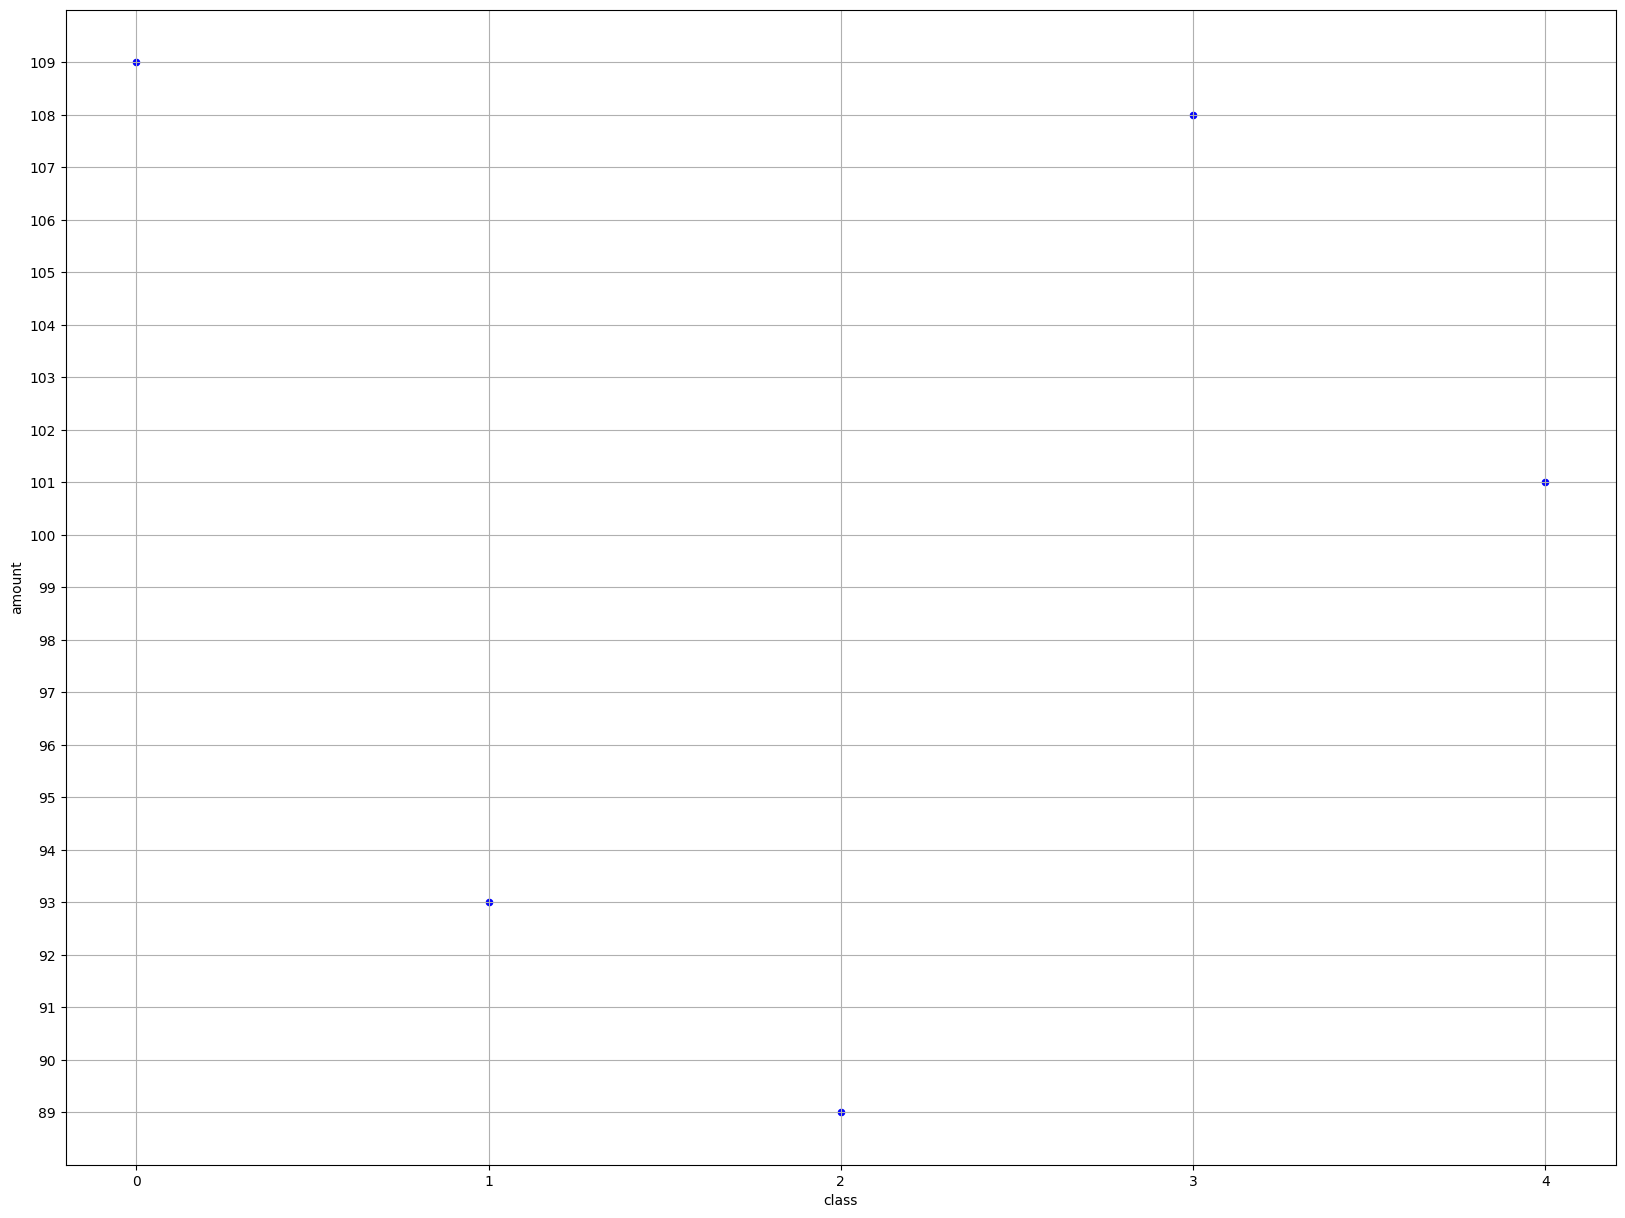

In [55]:
data_Kabsch = []
for cls in classes_Kabsch:
    data_Kabsch.append(len(cls['class']))
plt.figure(figsize=(20,15))
plt.scatter(range(len(classes_Kabsch)), data_Kabsch, s=20, c='blue')
plt.xlabel("class")
plt.ylabel("amount")
plt.xticks(range(len(classes_Kabsch)))
plt.yticks(np.arange(min(data_Kabsch), max(data_Kabsch)+1, 1.0))
plt.grid()

+ (3 pts). Compare results of algorithm from 2. and from 3. Explain the difference.

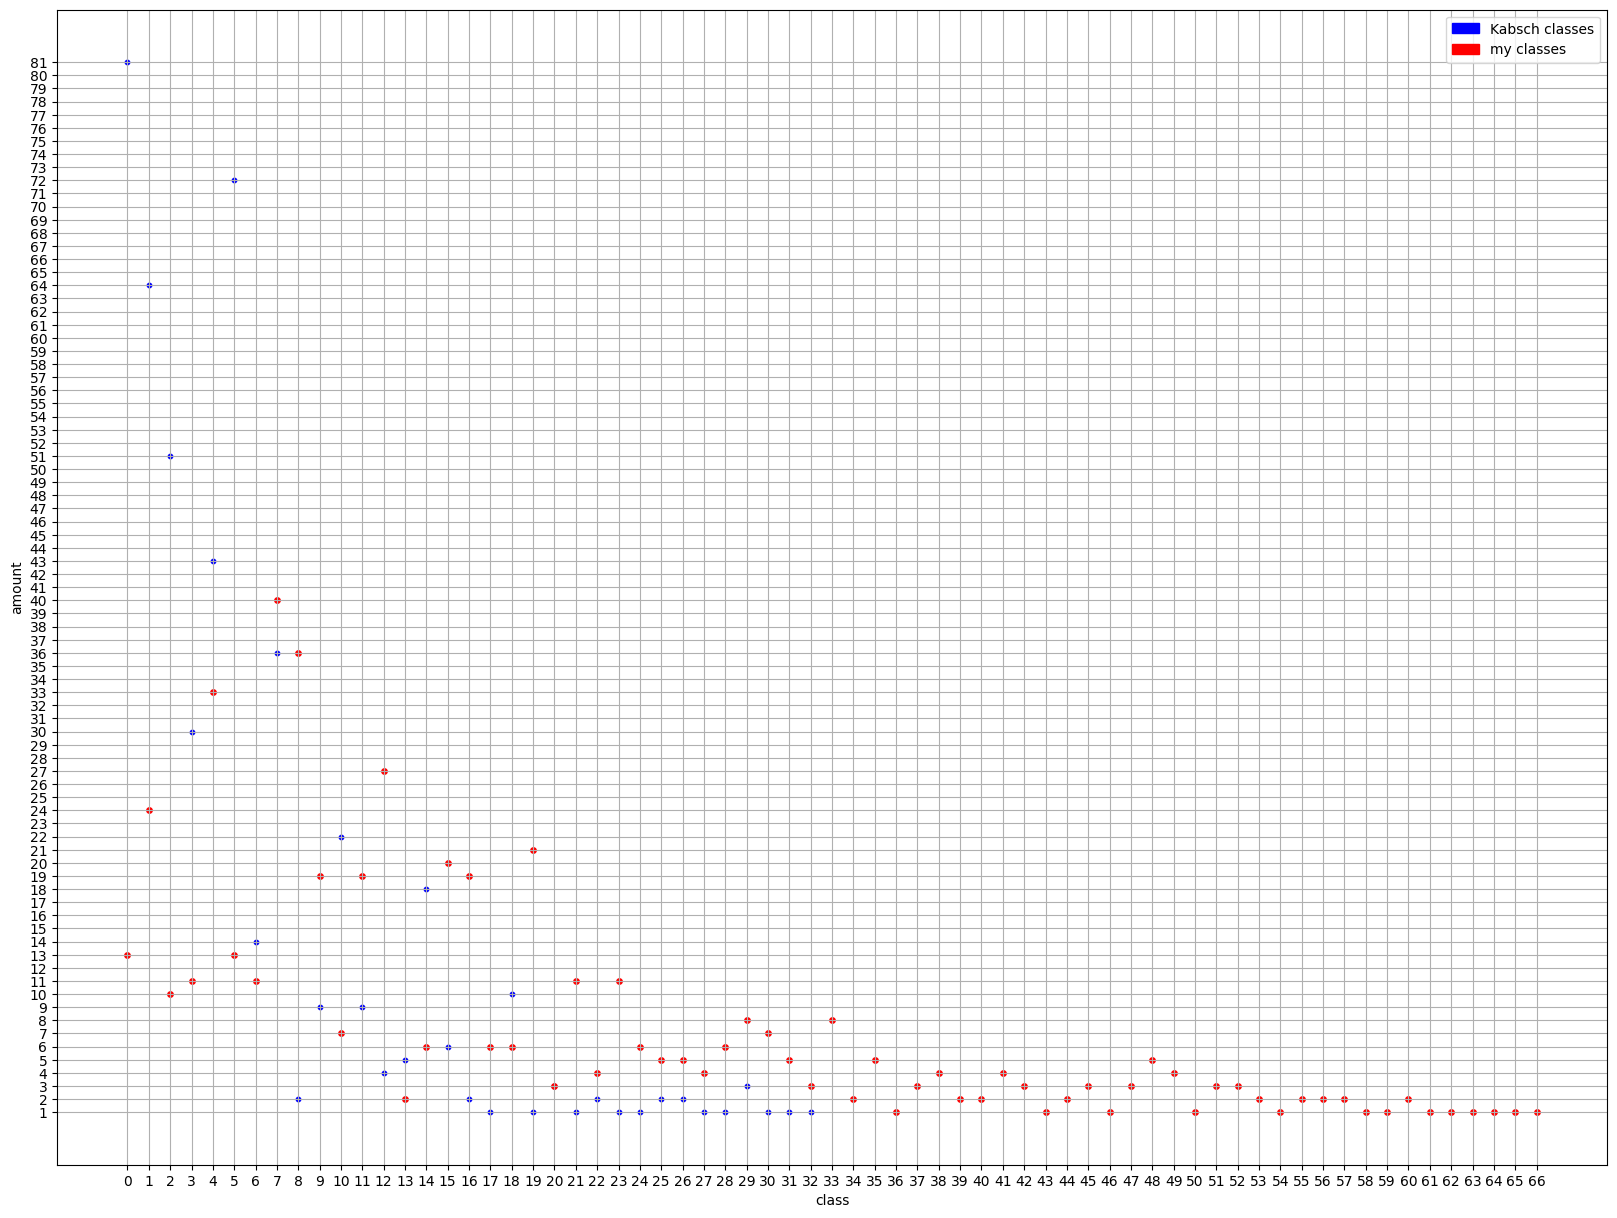

In [225]:
#your solution
plt.figure(figsize=(20,15))
plt.scatter(range(len(classes_Kabsch)), data_Kabsch, s=10, c='blue')
plt.scatter(range(len(classes)), data, s=15, c='red')

red_patch = mpatches.Patch(color='blue', label='Kabsch classes')
blue_patch = mpatches.Patch(color='red', label='my classes')
plt.legend(handles=[red_patch, blue_patch])

plt.xlabel("class")
plt.ylabel("amount")
plt.xticks(range(max(len(classes_Kabsch),len(classes))))
plt.yticks(np.arange(min(data_Kabsch), max(data_Kabsch)+1, 1.0))
plt.grid()

The difference between classifiers may be explained as follows:
1) My own classifier uses the fact that we know name of vectors in every molecul. Thus, it measures the angle between the same vecotrs for both molecus (B in my case). Additionally i use the fact that arccos() is in [0, Pi] interval. And rotating the vector by this angle does not guarantee that they become colinear and moleculs coincide. Thus, additional check is needed after rotation in orer to decide if the moleculs coincide or not. So L1(molecul1-molecul2)<= machine eps,  is computed. If they do not coincide, maybe tha rotation was wrong and one more rotation for opposite angle is applied. Then check coincodence one more time. 
For Kabsch classifier does not have limitations of arccos() range because the rotation matrix is computed directly.
2) Kabsch calculates rotation matrix based on mimizing RMSD (optimization problem)
Kabsch calculates H matrix based on covariance of moleculs. If moleculs are equal, H will be mostly diagonal. 

$\min{\sum{\|Uq_i-p_i\|^2}} $ where $\sum{\|Uq_i-p_i\|^2} = trace((UQ-P)^T(UQ-P)) = trace(Q^TQ)+trace(P^TP)+2trace(P^TUQ)$ , where U -rotation matrix, P and Q - some moleculs. Since only 3-rd term depends on U, and since
$trace(P^TUQ) = trace(UQP^T) = trace(UH)$ the problem is equivalent to finding such $U$ that minimizes $trace(UH)$. And $U$ might be computed with $SVD(H)$.

Additionally, Kabsch deals with reflections and classifies the reflected moleculs as one class, which might be not in fact. Thus, it produces less classes but more elements per class.
Good [paper](https://math.nist.gov/~JBernal/kujustf.pdf) for this algo + algebraic explanation.

Both distributions of classes look like being sampled from [Rayleigh distribution](https://en.wikipedia.org/wiki/Rayleigh_distribution)


# Problem 4 (Disentangled representation) (12 pts)

## Brief intro

The main component of [GAN](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html) is Generator network. Generator is such model that takes as input random vector and produces an image. In this task, we will work with the already pre-trained generator $G$. Here are a few things you need to know about this model:



1.   **Model input:** batch of random vectors $z\sim N(0,1)$ with normally distributed values of size **(Batch_Size,100)**. Here, Batch_Size is a number of images we want to generate
2.   **Model output:** $\mathrm{images} = G(z)$ - batch of images with size **(Batch_Size,3,64,64)**. Here **3** - defines number of image channels (3 for RGB images), **64, 64** - width and height.
3.   **Model structure:** generator is a set of sequentially appplied functions. Each function input is the output of the previous one. In other words, $G(z) = f_N(f_{N-1}...f_1(f_0(z)))$. $N$ - defines number of functions in generator.



### Disentanglement

The good property of GAN is that generator input space has a set of meaningful directions - moving input vector along this directions produce interpretable changes in image. For example, we can change a Pose, Age, Expression or even add eyeglasses. You can read more about it on [resource](https://genforce.github.io/interfacegan/). The main question is how to find such good directions. This problem is called disentanglement.

![](https://github.com/genforce/interfacegan/blob/master/docs/assets/teaser.jpg?raw=true)

## Problem discription 

We are going to find meaningful directions using SVD applied over the Jacobian matrix of some hidden output with respect to model input. **i-th** hidden output of generator model is defined by formula $G_{i}(z) = f_i(f_{i-1}...f_1(f_0(z))))$, where $i < N$. So, the task could be splitted on four main parts:

1. **(4 pts)**   Write the function **Get_Hidden_Output**, which reproduces formula $G_{i}(z) = f_i(f_{i-1}...f_1(f_0(z))))$
2. **(3 pts)**   Calculate jacobian matrix $J$ of generator $G$ for several **i** values. For each of them:

*   Calculate the jacobian matrix with respect to $z$: $\frac{\partial G(z)}{\partial z}$
*   Reshape jacobian matrix to have the size **(Batch_Size * Hidden_Output_Size,100)**

3. **(3 pts)**  Apply SVD to jacobian matrix ($J = U @ S @ V.T$) from previous step

4. **(2 pts)**  Take several directions from matrix $V$ (particular columns), and run visualization code (already written for you). Leave a comment on what you got (how found directions affect image)

**Attention!!!**

1.  Please run the code on google colab to fulfil packages requirements
2.  Jacobian matrix computation may take more than 20 minutes!
3.  Use GPU runtime to accelerate computations

## Prerequisites

In [58]:
!pip install functorch

Defaulting to user installation because normal site-packages is not writeable


In [59]:
import torch
from torch import nn
import requests
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils as vutils
from torchvision import transforms
from tqdm import tqdm
from functorch import vmap, jacfwd, jacrev
from functorch.experimental import replace_all_batch_norm_modules_

/home/mark/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
#   hidden generator size
ngf = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

print(f"Device: {device}, latent size {nz}, generator hidden dim {ngf}, number of image channels {nc}")

Device: cuda:0, latent size 100, generator hidden dim 64, number of image channels 3


In [61]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [62]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )
    def get_function_output(self, inp, index=0):
      if index == 0:
        inp = inp[:,:,None,None]
      return self.main[index](inp)
      
    def get_number_of_layers(self):
      return len(self.main)

    def forward(self, input):
        return self.main(input[:,:,None,None])

In [63]:
file_id = "1hIh2-8KjcUku1Dl-mLYqEObbODrCW_Fp"
destination = './G_checkpoint.pt'
download_file_from_google_drive(file_id, destination)
G = Generator(1).to(device)
G.load_state_dict(torch.load('./G_checkpoint.pt', map_location="cpu"))
replace_all_batch_norm_modules_(G)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  

In [64]:
def sample_batch(batch_size):
  return torch.randn((batch_size,nz),device=device)

In [65]:
def ToPILImage(tensor):
  return transforms.ToPILImage()(tensor)

In [66]:
def ConvertTensorsToOne(tensor, nrow=None):
  if nrow is None:
    nrow = int(tensor.size(0) ** 0.5)
  return vutils.make_grid(tensor, padding=2, normalize=True, nrow=nrow).cpu()

## Generator network visualization

In [67]:
# generator model consist of 14 functions numbered from 0 to 13

G

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  

In [68]:
# sample 64 random vectors to produce 64 images

z = sample_batch(64)

z.shape

torch.Size([64, 100])

In [69]:
# producing images

out = G(z)

out.shape

torch.Size([64, 3, 64, 64])

In [70]:
# generate hidden output for given input (remember that functions are applied sequentially - input should be the output of previous function)
# index defines which function output will be returned
# for function with index 0 input will be model input "z"

hidden_output = G.get_function_output(z,index=0)

hidden_output.shape

torch.Size([64, 512, 4, 4])

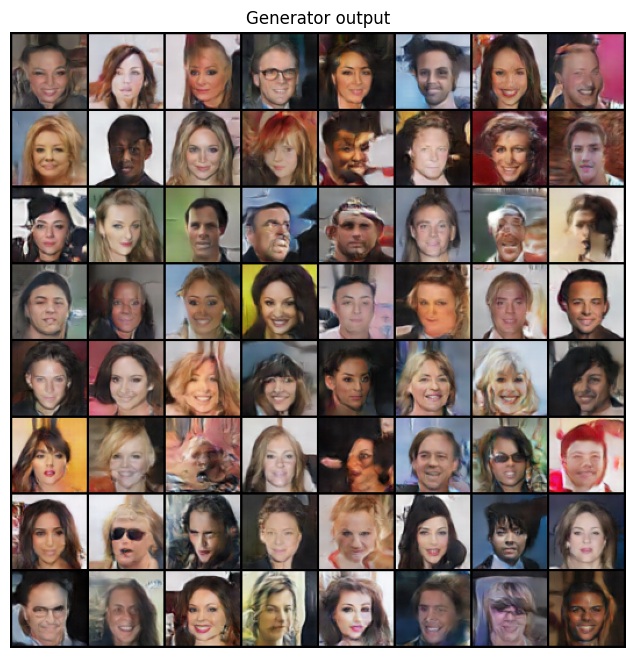

In [71]:
# plotting the images by combining them into one, with 8 images in each row (nrow=8)

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Generator output")
plt.imshow(ToPILImage(ConvertTensorsToOne(out, nrow=8)))

## Perform experiments

**Define the function that returns the output of any generator function for given input z and generator function index (4 pts)**

In [72]:
def Get_Hidden_Output(z,index):
  assert index >= 0

  out = z
  for i in range(index):
    out = G.get_function_output(out, index=i)
  return out

**Define the function that calculates the jacobian matrix based on given input z and generator function index (use the function which you implemented earlier) (3 pts)**

In [73]:
def Calc_Gradient(z, index):
  grads = []
  for i in range(index):
      z_var = torch.autograd.Variable(z, requires_grad=True)
      out = Get_Hidden_Output(z_var, i)
      grad = torch.autograd.grad(out, z_var, torch.ones_like(out))[0][:,None]
      grads.append(grad)
  grads = torch.cat(grads,dim=1)
  return grads

In [156]:
index = 3
z = sample_batch(20)
grads = Calc_Gradient(z,index)
grads = grads.reshape(grads.shape[0]*grads.shape[1],grads.shape[2]) # reshaping to **(Batch_Size * Hidden_Output_Size,100)** as asked.
print(grads.shape)

torch.Size([60, 100])


**Calculate SVD and visualize singular values for several generator function indexes (2-3 indexes are enough). Based on singular value plots, decide what generator function is more useful for disentangled representation search and why, leave a comment.(3 pts)**

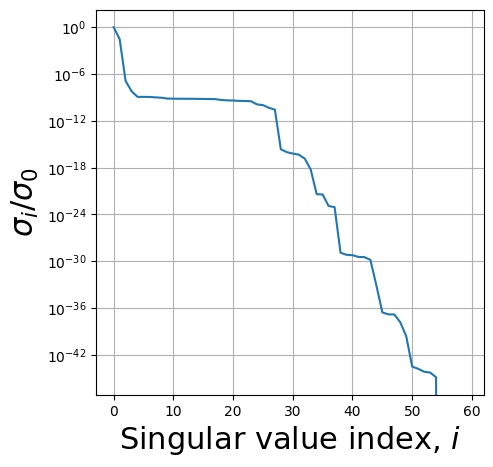

In [157]:
U, S, V = torch.svd(grads)
S = torch.Tensor.cpu(S)
plt.figure(figsize=(5,5))
plot = plt.semilogy(S/S[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=22)
plt.xlabel(r"Singular value index, $i$", fontsize=22)
plt.grid(True)

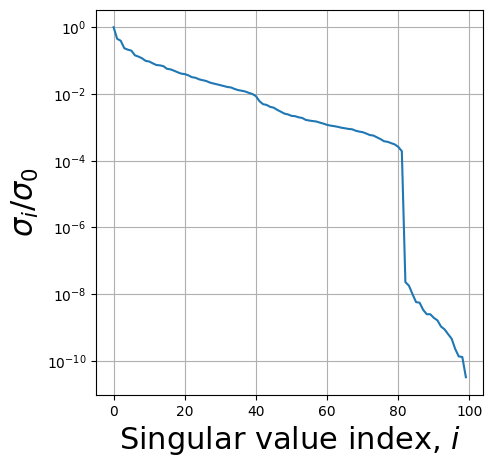

In [161]:
index = 8
z = sample_batch(20)
grads = Calc_Gradient(z,index)
grads = grads.reshape(grads.shape[0]*grads.shape[1],grads.shape[2])
U, S, V = torch.svd(grads)
S = torch.Tensor.cpu(S)
plt.figure(figsize=(5,5))
plot = plt.semilogy(S/S[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=22)
plt.xlabel(r"Singular value index, $i$", fontsize=22)
plt.grid(True)

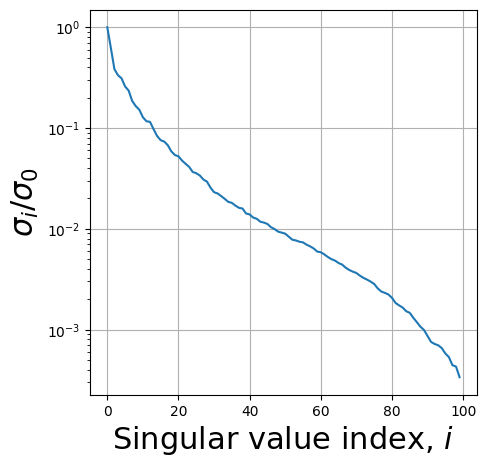

In [165]:
index = 13
z = sample_batch(20)
grads = Calc_Gradient(z,index)
grads = grads.reshape(grads.shape[0]*grads.shape[1],grads.shape[2])
U, S, V = torch.svd(grads)
S = torch.Tensor.cpu(S)
plt.figure(figsize=(5,5))
plot = plt.semilogy(S/S[0])
plt.ylabel(r"$\sigma_i / \sigma_0$", fontsize=22)
plt.xlabel(r"Singular value index, $i$", fontsize=22)
plt.grid(True)

I would choose Generator function with all (13) layers because singular values exponentialy decay (or linear in log scale) without huge "jumps" and max(S)/min(S) is not that high, so all the transformations make sense.

**Choose some directions from matrix V (some columns) corresponding to chosen generator function index (based on previous step). Run visualization code. Which image attributes affects chosen directions? (2 pts)**

In [79]:
def make_edit(input, dirs):
  output = G(input)
  input_shift = input[:,None,:] + dirs[None,:,:]*3
  output_shift = G(input_shift.reshape(-1,nz)).reshape(input.size(0),-1,3,64,64)
  return torch.cat([output[:,None],output_shift],dim=1).reshape(-1,3,64,64)

torch.Size([6, 100])


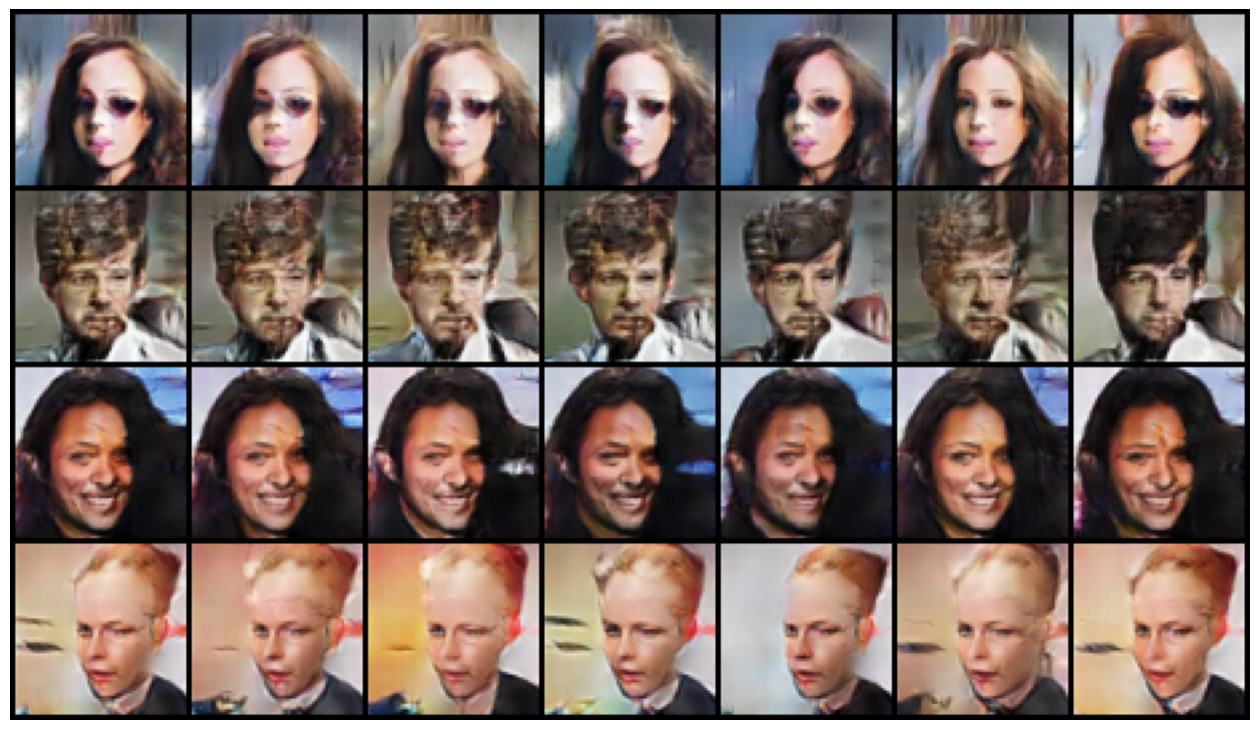

In [176]:
V = torch.Tensor.cpu(V)
V_m = V[:6,:]
input = sample_batch(4)
V_m = torch.Tensor(V_m).to(device)
dirs = V_m  # your solution, number of directions should be the first dimension
print(dirs.shape)
out = make_edit(input, dirs)
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(ToPILImage(ConvertTensorsToOne(out, nrow=(dirs.size(0)+1))))

First 6 columns of V mostly effect the chin and eyes

5
torch.Size([5, 100])


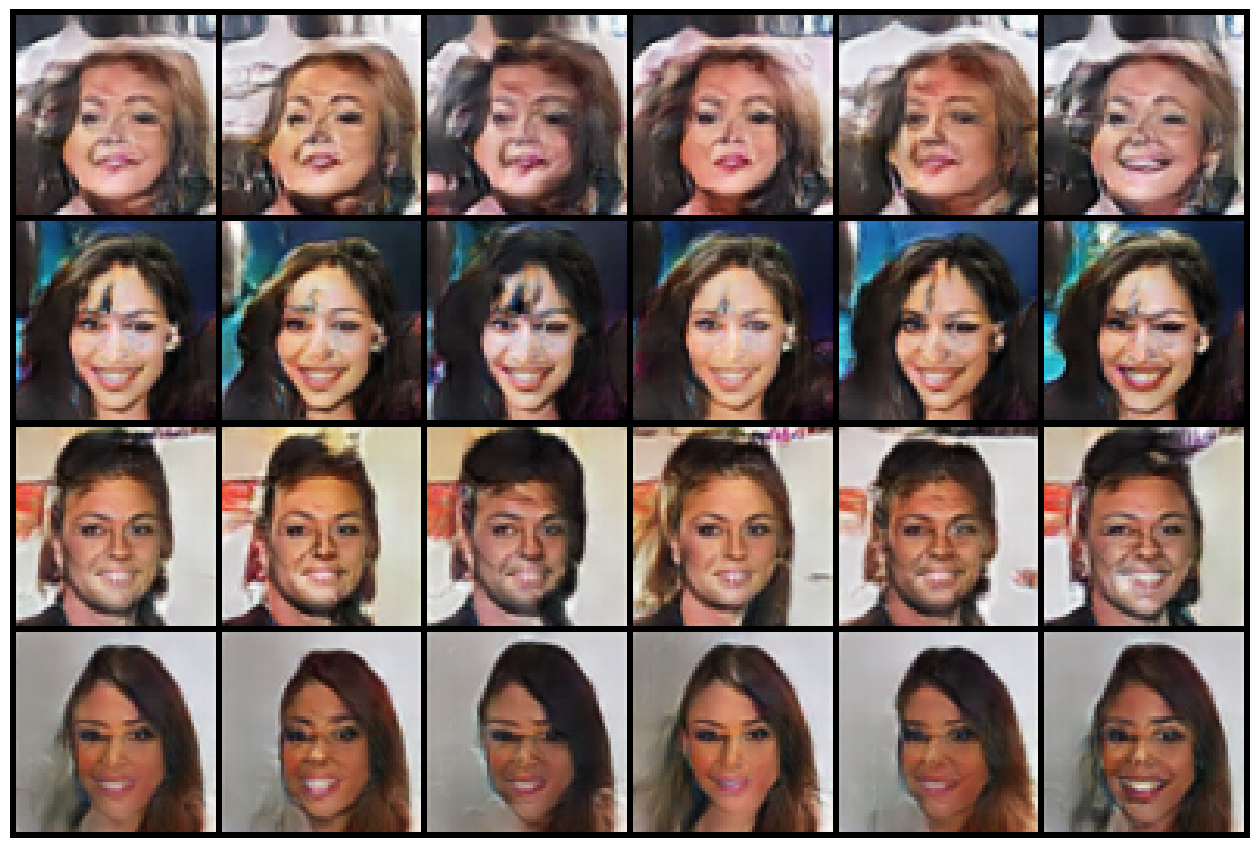

In [192]:
V_m = V[75:80,:]
input = sample_batch(4)
# V_m = np.expand_dims(V_m, axis=0)
V_m = torch.Tensor(V_m).to(device)
dirs =  V_m  # your solution, number of directions should be the first dimension
print(dirs.shape[0])
print(dirs.shape)
out = make_edit(input, dirs)
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(ToPILImage(ConvertTensorsToOne(out, nrow=(dirs.size(0)+1))))

columns 15-20 of V mostly effect face orientation and forehead

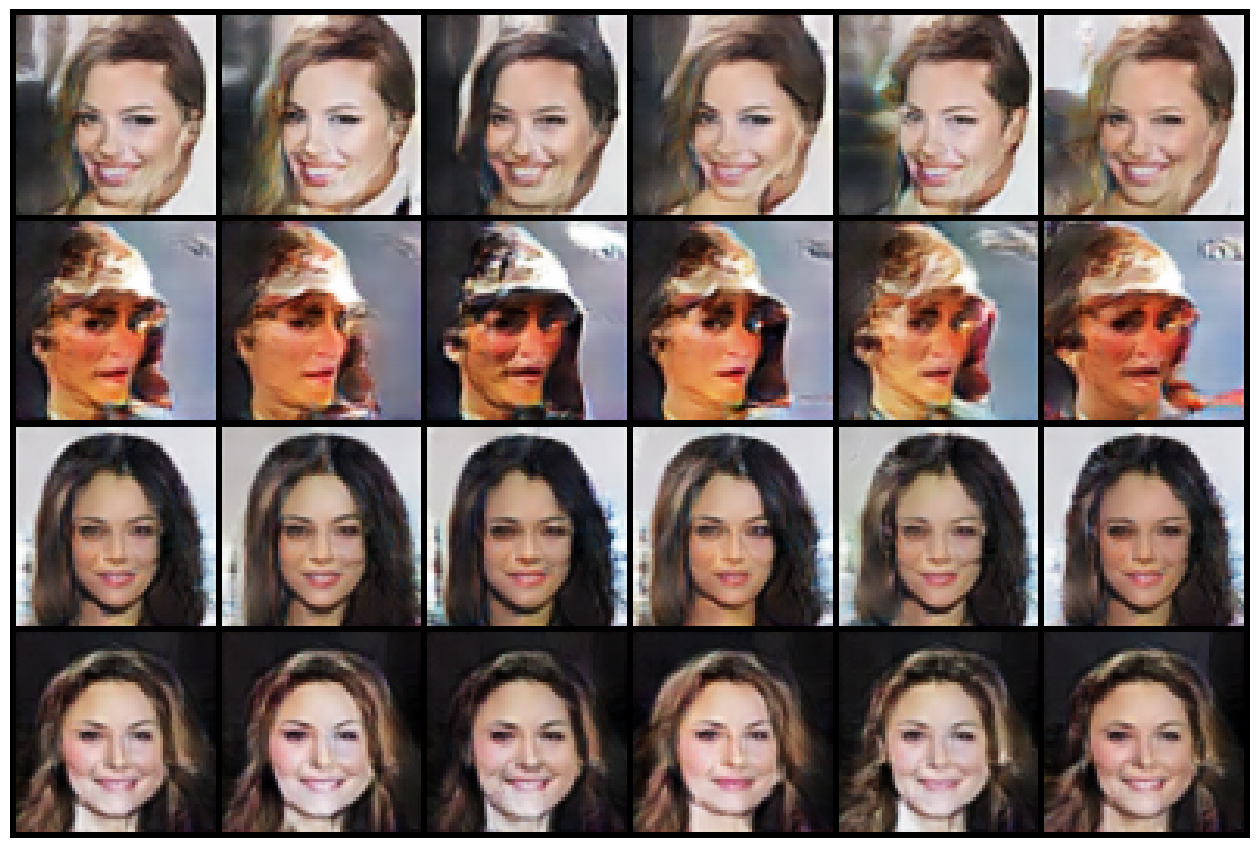

In [206]:
V_m = V[95:100,:]
input = sample_batch(4)
V_m = torch.Tensor(V_m).to(device)
dirs =  V_m  # your solution, number of directions should be the first dimension
out = make_edit(input, dirs)
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(ToPILImage(ConvertTensorsToOne(out, nrow=(dirs.size(0)+1))))

columns 95-100 of V does not change faces significantly and its hard to determine the consistent pattern. But it might be seen that smile and hair color are slightly changed